
## Tangent: Introduction to NNs
> Today's question: **How can I classify handwritten digits?**

Neural networks are getting more and more popular as they get more and more powerful. Thus, it is imperative to know how they are used and at least a high-level understanding of what they are and how they are implemented. Thus, in today's lecture, we'll be going through a famous introduction application of neural networks -- MNIST handwritten digit recognition.

#### Learning outcomes:
- Tensorflow basics
- Reshaping inputs, outputs
- Creating a Sequential model
- Training a model
- GPU acceleration (just a sprinkle)
- Overfitting/underfitting + validation

First, we load common libraries becuase it is very likely that we will use them in our project.

In [ ]:
import matplotlib.pyplot as plt # plotting data and results
import numpy as np              # reshaping and basic numerical methods

Tensorflow is a machine learning framework primarily built and maintained by Google that makes it very simple to create machine learning models. In our case, we want to build an MLP, so this library suffices.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, losses, models, optimizers

Now, we need to get our MNIST dataset from somewhere. We could get them from the 'original' website, http://yann.lecun.com/exdb/mnist/, but luckily for us, it comes pre-packaged in Tensorflow.

> Why would a dataset come pre-packaged in a library like TF?

In [ ]:
from tensorflow.keras.datasets import mnist

Load data

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


What do we do when we first load data?

- Look at inputs
- Look at outputs

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_train[0]

5

In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

Since we expect MNIST to be images, we can also view the raw data as images

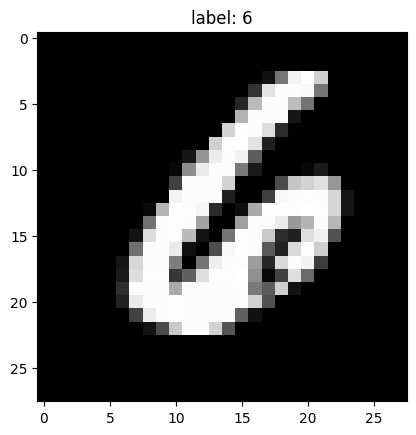

In [ ]:
idx = np.random.randint(len(x_train))

plt.imshow(x_train[idx], cmap='gray')
plt.title("label: "+str(y_train[idx]))
plt.show()

#### Preprocess data
The next thing we need to do now is to reform our data such that it is valid to be used in conjunction with a neural network.
> What is the required shape of the inputs?

In [ ]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [ ]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
x_train[0].shape

(784,)

> What is the shape of the outputs?

In [ ]:
# One-hot encode the labels
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
y_train.shape

(60000, 10)

### Building the model
Now, we can start with the actual NN. We first define our input and output sizes.

In [ ]:
in_shape = 28*28
out_shape = 10

Now, we define a _Sequential_ model in Tensorflow. What this essentially means is that the neural network contains layers of processing units stacks upon one another, and data flows through each from input to output. It is generally considered the simplest model, and is what we need to create an MLP.

First, we can optionally define an input 'layer' to keep track of what the expected shape of the input is.

Each next layer here is called a _Dense_ layer: each neuron from one layer is connected to every other from the next layer. These are also called fully-connected layers, and are used commonly in MLPs.

Each of these layers has a regularised linear unit non-linear activation function. It is defined as:
$$ \text{ReLU}(x) = \max(0,x) $$

Finally, the final layer has a softmax activation function on it, which (i) is used to change the raw outputs to probabilities, and (ii) is the most commonly used output activation function in classification tasks.

In [ ]:
model = models.Sequential() # At each layer weights + bias so X -> W*X + b ||| W1*X +b1 -> W2(W1*X +b1) + b2 = W*X+b
model.add(layers.Input(shape=(in_shape,)))
model.add(layers.Dense(128, activation='relu')) # between layers non-linear "activation function"
model.add(layers.Dense(64, activation='relu')) # between layers non-linear "activation function"
model.add(layers.Dense(out_shape, activation='softmax')) # final layer and the output: categorical classification function (sigmoid for binary)

We now define a few important training requirements for the model -- how does it train, what loss function to use, and how do I measure how good my model is doing.

In [ ]:
model.compile(optimizer=optimizers.Adam(), #
                loss='categorical_crossentropy',
                metrics=['accuracy'])

It is generally very good practice to also look at a summary of the model, just to make sure that the form of the model is what you want it to be. In this case, it should look all good!

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Training time! We now just need to call `model.fit()` with our data, the number of training cycles (epochs) and other factors that may influence training

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9562 - loss: 0.1554 - val_accuracy: 0.9378 - val_loss: 0.2660
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9588 - loss: 0.1391 - val_accuracy: 0.9530 - val_loss: 0.2516
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9661 - loss: 0.1173 - val_accuracy: 0.9501 - val_loss: 0.2322
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9702 - loss: 0.1009 - val_accuracy: 0.9536 - val_loss: 0.2371
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9710 - loss: 0.0960 - val_accuracy: 0.9481 - val_loss: 0.2688
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9727 - loss: 0.0967 - val_accuracy: 0.9562 - val_loss: 0.2194
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9757 - loss: 0.0825 - val_accuracy: 0.9528 - val_loss: 0.2608
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9753 - loss: 0.0861 - val_accuracy: 

In order to make sure our model is training well, we can plot loss curves. This will also tell us whether or not our model is overfitting, and if there is anything we can do to help it train (e.g. changing some hyperparameters).

In [ ]:
# gather up learning history
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

epochs = range(1, len(train_loss)+1)

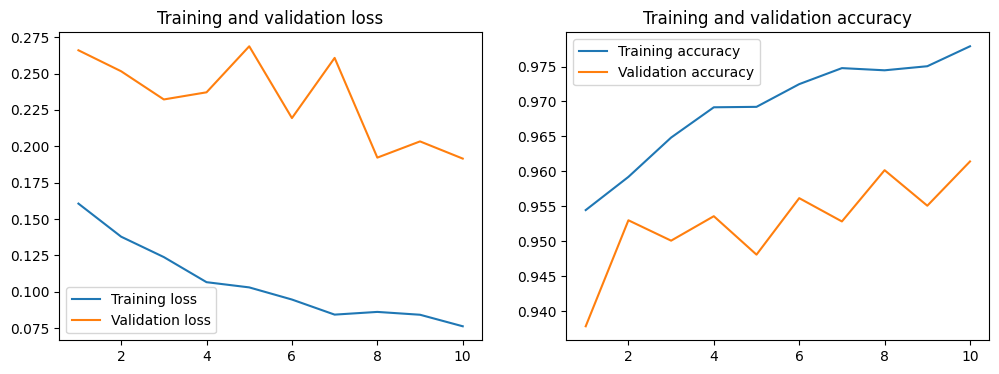

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
# plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
# plt.grid()
plt.legend()
plt.show()

Finally, we perform a test on a completely new, unseen dataset to prove that our model has indeed learnt how to classify images correctly.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9536 - loss: 0.2108
test_acc: 0.9575999975204468


From here, there are a lot of things we can do to continue our research:
- Save the model for use elsewhere or training at a later time
- Perform cross-validation
- Search for optimal hyperparameters
- Find and implement different neural network models.
- ...

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


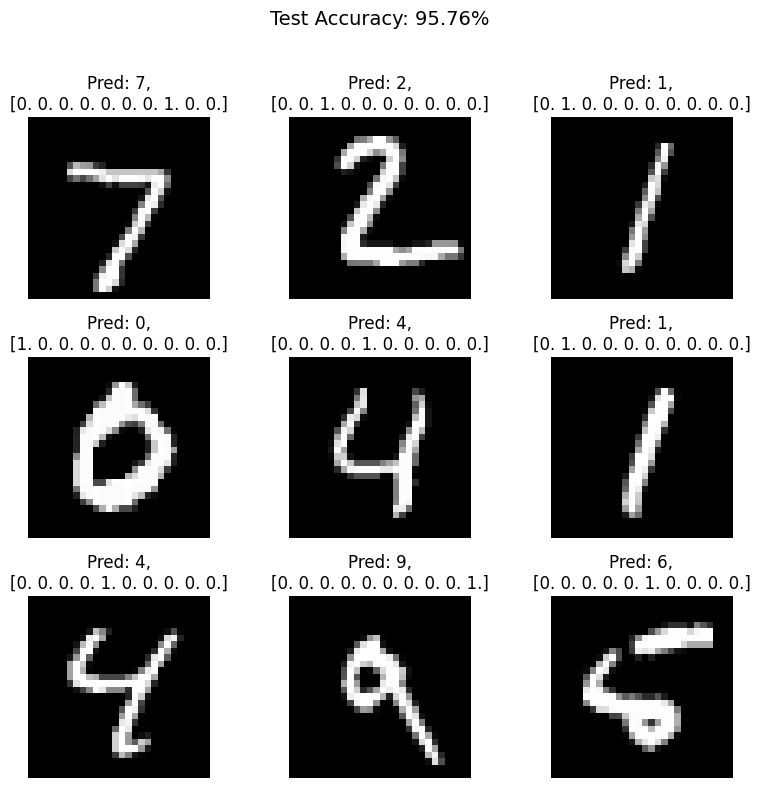

In [ ]:
# Predictions generation
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Select first 9 predictions
num_samples = 9
x_test_sample = x_test[:num_samples]
y_test_sample = y_test[:num_samples]
y_pred_sample = y_pred_classes[:num_samples]

# Visualize using 3 by 3 grid
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
fig.suptitle(f"Test Accuracy: {test_acc:.2%}", fontsize=14)

for i, ax in enumerate(axes.flat):
    ax.imshow(x_test_sample[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {y_pred_sample[i]},\n{y_test_sample[i]}")
    ax.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()